- MNIST Data - Image - MultiClass Classification

In [ ]:

from keras.datasets import mnist
from keras import models 
from keras import layers 
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255
x_val = train_images[:10000]
par_train_images = train_images[10000:]

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
y_val = train_labels[:10000]
par_train_labels = train_labels[10000:]

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
        loss='categorical_crossentropy', 
        metrics=['accuracy'])

history = network.fit(par_train_images, par_train_labels, epochs=20, batch_size=128, validation_data=(x_val,y_val))

test_loss , test_acc = network.evaluate(test_images,test_labels)
print('test acc:',test_acc)

Epoch 1/20
391/391 [==============================] - 6s 14ms/step - loss: 0.2763 - accuracy: 0.9197 - val_loss: 0.1706 - val_accuracy: 0.9469
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 0.1167 - accuracy: 0.9654 - val_loss: 0.1197 - val_accuracy: 0.9652
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0774 - accuracy: 0.9770 - val_loss: 0.0932 - val_accuracy: 0.9717
Epoch 4/20
391/391 [==============================] - 6s 14ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0809 - val_accuracy: 0.9771
Epoch 5/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0739 - val_accuracy: 0.9791
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0762 - val_accuracy: 0.9785
Epoch 7/20
391/391 [==============================] - 5s 13ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0749 - val_accuracy: 0.9807

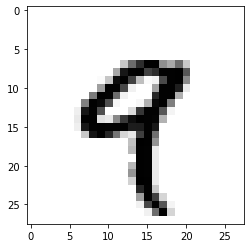

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit , cmap=plt.cm.binary)
plt.show()


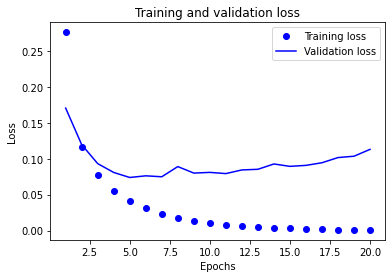

In [ ]:
# plot validation and train epochs loss
import matplotlib.pyplot as plt 

history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

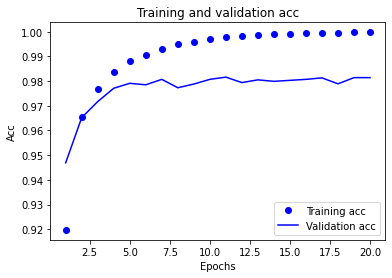

In [ ]:

acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1) 

plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('Acc') 
plt.legend() 
plt.show() 

- IMDB Data - Text - Binary Classification


In [ ]:
from keras.datasets import imdb
from keras import models 
from keras import layers 
from tensorflow.keras.utils import to_categorical
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension) )
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences (test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
history= model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test) 

Epoch 1/4
49/49 [==============================] - 3s 34ms/step - loss: 0.4817 - accuracy: 0.8074
Epoch 2/4
49/49 [==============================] - 3s 57ms/step - loss: 0.2771 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 2s 48ms/step - loss: 0.2111 - accuracy: 0.9251
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3352 - accuracy: 0.8658


In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.1355831 ],
       [0.9996657 ],
       [0.63078237],
       ...,
       [0.09405619],
       [0.0458504 ],
       [0.3999387 ]], dtype=float32)

- Reuters Data - Text - MultiClass Classification

In [ ]:
from keras.datasets import reuters
from keras import models 
from keras import layers 
from tensorflow.keras.utils import to_categorical
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension) )
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences (test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax')) 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history= model.fit(x_train, one_hot_train_labels, epochs=4, batch_size=512) 
results = model.evaluate(x_test, one_hot_test_labels) 

2110848/2110848 [==============================] - 0s 0us/step
Epoch 1/4
18/18 [==============================] - 2s 50ms/step - loss: 2.7367 - accuracy: 0.5223
Epoch 2/4
18/18 [==============================] - 1s 51ms/step - loss: 1.4065 - accuracy: 0.7222
Epoch 3/4
18/18 [==============================] - 1s 49ms/step - loss: 1.0004 - accuracy: 0.7928
Epoch 4/4
71/71 [==============================] - 1s 7ms/step - loss: 1.0580 - accuracy: 0.7680


 - Boston-Housing - Digit - House Price Prediction - Regression

In [ ]:
from keras.datasets import boston_housing
from keras import models 
from keras import layers 
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt 

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model(): 
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'] )
  return model

# K fold cross validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 300
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]], axis=0)

  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()

  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=1, verbose=0)

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

'''
  # first evaluation
  model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
'''
  
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel ('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# better visualization

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


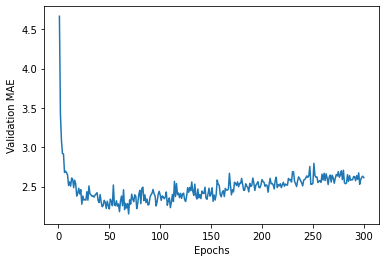

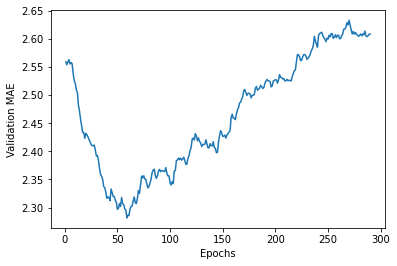